In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import r2_score# 선형 모델(Linear Models)
from sklearn.datasets import load_boston, load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
boston = load_boston()

In [3]:
boston_df = pd.DataFrame(   boston['data'],columns=boston['feature_names'])
boston_df['MEDV'] =boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
x_data = boston_df.iloc[:,:-1]
y_data = boston_df.iloc[:,-1]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                test_size=0.2,random_state=1)
# train, test set으로 분할(나눴음).

In [6]:
# *steps : list of estimators.
model = make_pipeline(StandardScaler(), SGDRegressor())
model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [7]:
# 결정계수 값
model.score( x_train, y_train)

0.7281797100727596

In [8]:
model.score(x_test, y_test)

0.7622398522422036

In [9]:
# 예측하기
x_test.values[0]

array([4.9320e-02, 3.3000e+01, 2.1800e+00, 0.0000e+00, 4.7200e-01,
       6.8490e+00, 7.0300e+01, 3.1827e+00, 7.0000e+00, 2.2200e+02,
       1.8400e+01, 3.9690e+02, 7.5300e+00])

In [10]:
# 예측하기
model.predict([x_test.values[0]])

array([32.13044794])

In [11]:
# 예측하기
model.predict(x_test.values[0].reshape(1,-1))

array([32.13044794])

In [12]:
# 딥러닝 tensorflow, pytorch배울텐데. 사이킷런처럼 파이프라인이 없음. 
# (사이킷런의 클래스처럼 만들어주는 케라스 제외하고)
#07.파일처럼 스케일링 수동으로 해줘야함.

In [13]:
x_data, y_data = iris_df.iloc[:,1:-1].values, iris_df.iloc[:,0].values
scaler_x = StandardScaler()
scaler_x.fit(x_data)
x_data_scale =  scaler_x.transform(x_data)

x_train, x_test, y_train, y_test = train_test_split(x_data_scale, y_data , test_size=0.2, random_state=1)

model_sgd = SGDRegressor()
model_sgd.fit(x_train, y_train)

print('train 점수:', model_sgd.score(x_train, y_train))
print('test 점수:', model_sgd.score(x_test, y_test))

pred = model_sgd.predict([[3.0, 1.4, 0.2]])
print('예측값:', pred)

NameError: name 'iris_df' is not defined

# 개인 과제
sl(target), feature(sw,pl,pw)
문제 : sw:3.0, pl:1.4, pw:0.2 인 경우 sl를 예측하시오
1. scale (standardscaring)
2. train, test
3. train, test score
4. 예측

강진영님

In [14]:
# 로드하고
# 데이터프레임으로만들고, x는 columns는  
iris=load_iris()
iris_df=pd.DataFrame(iris['data'],columns=iris['feature_names'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
# 컬럼값 지정하고,
# x데이터 지정
# y데이터 지정
iris_df.columns=['sl','sw','pl','pw']
x_data=iris_df[['sw','pl','pw']]
y_data=iris_df[['sl']]

In [16]:
# 트레인, 테스트 나누고
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                test_size=0.2,random_state=1)

In [17]:
# 파이프라인으로(스케일링, 경사하강법 때리고)
# x,y데이터 넣어주고
model=make_pipeline(StandardScaler(),SGDRegressor() )
model.fit(x_train, y_train)


C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [18]:
# 스코어 = 트레인 데이터를 새로 스케일링 작업
model.score(x_train, y_train)

0.802137949071476

In [19]:
# 테스트도 스케일링 해야지
model.score(x_test, y_test)

0.8220752522509823

In [20]:
# p값에 넣어주는건? 
p=model.predict([[3.0,1.4,0.2]])

In [21]:
p

array([4.74436921])

# 교차검증(데이터가 작은 경우)
- 데이터를 두개로 분리하고 모델을 생성 및 검증하였지만, 데이터를 분리하였기 때문에 훈련에 사용할 수 있는 양도 작아지고, 분리가 잘 안된 경우에는 잘못된 검증이 될 수 있음
- 이럴 경우에는 테스트셋을 여러개로 구성하여 교차 검증을 진행
- cross_val_score() 함수는 교차 검증을 수행하여 모델을 검증


In [22]:
# ![교차검증](img/교차검증.png)

In [23]:
# cv값 디폴트 5개, 조절도 가능
# 각각 스코어(결정계수값)의 평균값을 최종 스코어로 나옴
# iris데이터임.

In [24]:
r2scores = cross_val_score(model, x_data, y_data, cv=5, scoring='r2', verbose=1)
print(r2scores)
print(r2scores.mean())
# 교차검증값(score)이 나옴.
# 교차검증(score)평균값도 나옴.

[0.53729005 0.79633292 0.06170617 0.68921589 0.42903219]
0.5027154435060781


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d a

# 다중 공선성
다중공선성 회귀 분석에서 사용된 모형의 일부 설명 변수가 다른 설명 변수와 상관 정도가 높아, 데이터 분석 시 부정적인 영향을 미치는 현상

X1은 일평균 음주량을 독립 변수 X2는 혈중 알코올 농도 둘의 상관관계가 높아 설명령이 약해진다 # 두가지를 특성데이터로 쓰기에는 상관관계가 높다?

회귀 모델에서 다중공선성을 파악할 수 있는 대표적인 방법은 VIF 임. 
VIF (Variance inflation Factors 분산팽창요인)
(사이킷런엔 없고 다른 패키지(from statsmodels.stats.outliers_influence import variance_inflation_factor
)에 있음)
- 안전 : VIF < 5
- 주의 : 5 < VIF < 10
- 위험 : 10 < VIF

* 개념을 잘 알고 있을 것
---
1. 상관관계가 낮음 #점수가 안나옴.
2. 다중 공선성 
* check
3. scale
4. 학습

In [25]:
boston_df.corr() # 상관관계 확인

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [26]:
import seaborn as sb

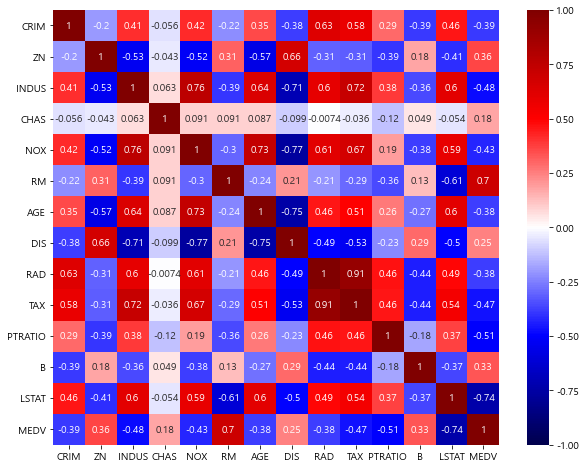

In [27]:
plt.figure(figsize=(10,8))
sb.heatmap(boston_df.corr(), annot=True, vmin = -1, vmax = 1, cmap='seismic') # -1<=상관계수값<=1
plt.show()

In [28]:
boston_df.shape[1] # 14개 칼럼

14

In [29]:
boston_df.values.shape # (ndarray) # 컬럼별 다중공선성을 ....

(506, 14)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(boston_df.values, i )  for i in range( boston_df.shape[1] ) ]
vif['features'] = boston_df.columns
vif
# RM,PTRATIO을 제거해야함.
# 이후 score 확인.
# boston_df.values 전체 데이터를 확인하려고 한 것
# , 실제로는 특성데이터 x_data, y_data만 뽑아도됨.


,VIF Factor,features
0,2.131404,CRIM
1,2.910004,ZN
2,14.485874,INDUS
3,1.176266,CHAS
4,74.004269,NOX
5,136.101743,RM
6,21.398863,AGE
7,15.430455,DIS
8,15.369980,RAD
9,61.939713,TAX


 특성데이터가 많은경우: 다중공선성(컬럼제거), 타겟(라벨)에 상관관계가 낮은 컬럼

미쳤네 ㅋ.,ㅋ

# 문제

1.  캘리포니아 주택가격을 이용하여   crossvalidation 값을 구하시요.

2.  다중공선성을 확인한후에 다중공선성이 높은 컬럼을 제외하고 학습하여 crossvalidation값을 확인하시요


캘리포니아 주택 가격 데이터

| 속성 | 설명 |
|------|------|
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 자치시(town)별 비소매 상업지역 토지 비율 |
| AveBedrms | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| Population | 10,000,000당  일산화질소 농도 |
| AveOccup | 주택 1가구당 평균 방의 수 |
| Latitude | 1940년 이전에 건축된 소유주택 비율 |
| Longitude | 5개의 보스턴 고용 센터까지의 가중 거리 |


In [31]:
from sklearn.datasets import fetch_california_housing

In [32]:
cal = fetch_california_housing()
cal

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [33]:
cal['data'].shape

(20640, 8)

In [34]:
cal_df=pd.DataFrame(cal['data'],columns=cal['feature_names'])
cal_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [35]:
cal_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


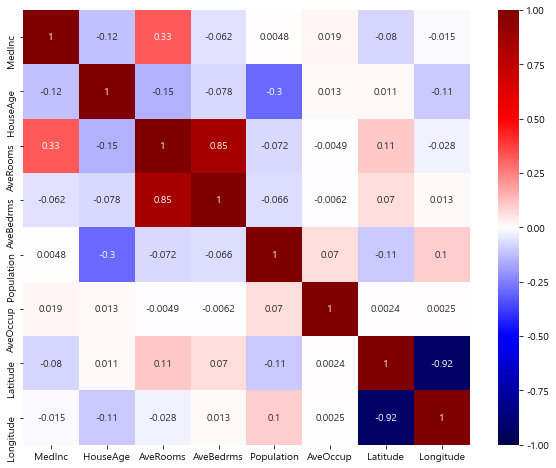

In [36]:
plt.figure(figsize=(10,8))
sb.heatmap(cal_df.corr(), annot=True, vmin = -1, vmax = 1, cmap='seismic') # -1<=상관계수값<=1
plt.show()

In [37]:
cal_df.shape[1]

8

In [38]:
cal_df.values.shape

(20640, 8)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(cal_df.values, i )  for i in range( cal_df.shape[1] ) ]
vif['features'] = cal_df.columns
vif

,VIF Factor,features
0,11.511140,MedInc
1,7.195917,HouseAge
2,45.993601,AveRooms
3,43.590314,AveBedrms
4,2.935745,Population
5,1.095243,AveOccup
6,559.874071,Latitude
7,633.711654,Longitude


In [40]:
r2scores = cross_val_score(model, x_data, y_data, cv=5, scoring='r2', verbose=1)
print(r2scores)
print(r2scores.mean())

[0.54038606 0.79672356 0.08551956 0.67963898 0.41550614]
0.5035548612708945


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d a

성현이형 답

In [ ]:


x_data = cal_df.iloc[:, :-1]
y_data = cal_df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data.values, test_size = 0.2, random_state=1) # ndarray
model = make_pipeline(StandardScaler(),SGDRegressor(verbose=1))
model.fit(x_train, y_train)
r2scores = cross_val_score(model, x_data, y_data, cv=5, scoring='r2',verbose=1)
print(r2scores)
print(r2scores.mean())

cal_df.corr()

# 히트맵 그리기
plt.figure(figsize=(10,8))
sb.heatmap(cal_df.corr(), annot=True, vmin=-1, vmax=1, cmap='bwr')
plt.show()

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(cal_df.values, i )  for i in range( cal_df.shape[1] ) ]
vif['features'] = cal_df.columns
vif

# vif가 높은 Latitude, Longitude를 제외
cal_df = cal_df.drop(['Latitude', 'Longitude'], axis=1)
cal_df.head()

# 다시 교차검증
x_data = cal_df.iloc[:, :-1]
y_data = cal_df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data.values, test_size = 0.2, random_state=1) # ndarray
model = make_pipeline(StandardScaler(),SGDRegressor(verbose=1))
model.fit(x_train, y_train)
r2scores = cross_val_score(model, x_data, y_data, cv=5, scoring='r2',verbose=1)
print(r2scores)
print(r2scores.mean())

# 다중공선성 재확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(cal_df.values, i )  for i in range( cal_df.shape[1] ) ]
vif['features'] = cal_df.columns
vif